# Federated Learning

In [1]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the path to the results file
file_path = "../src/plots/federated_learning/mnist_resnet18_results.json"

with open(file_path, "r") as file:
    data = json.load(file)

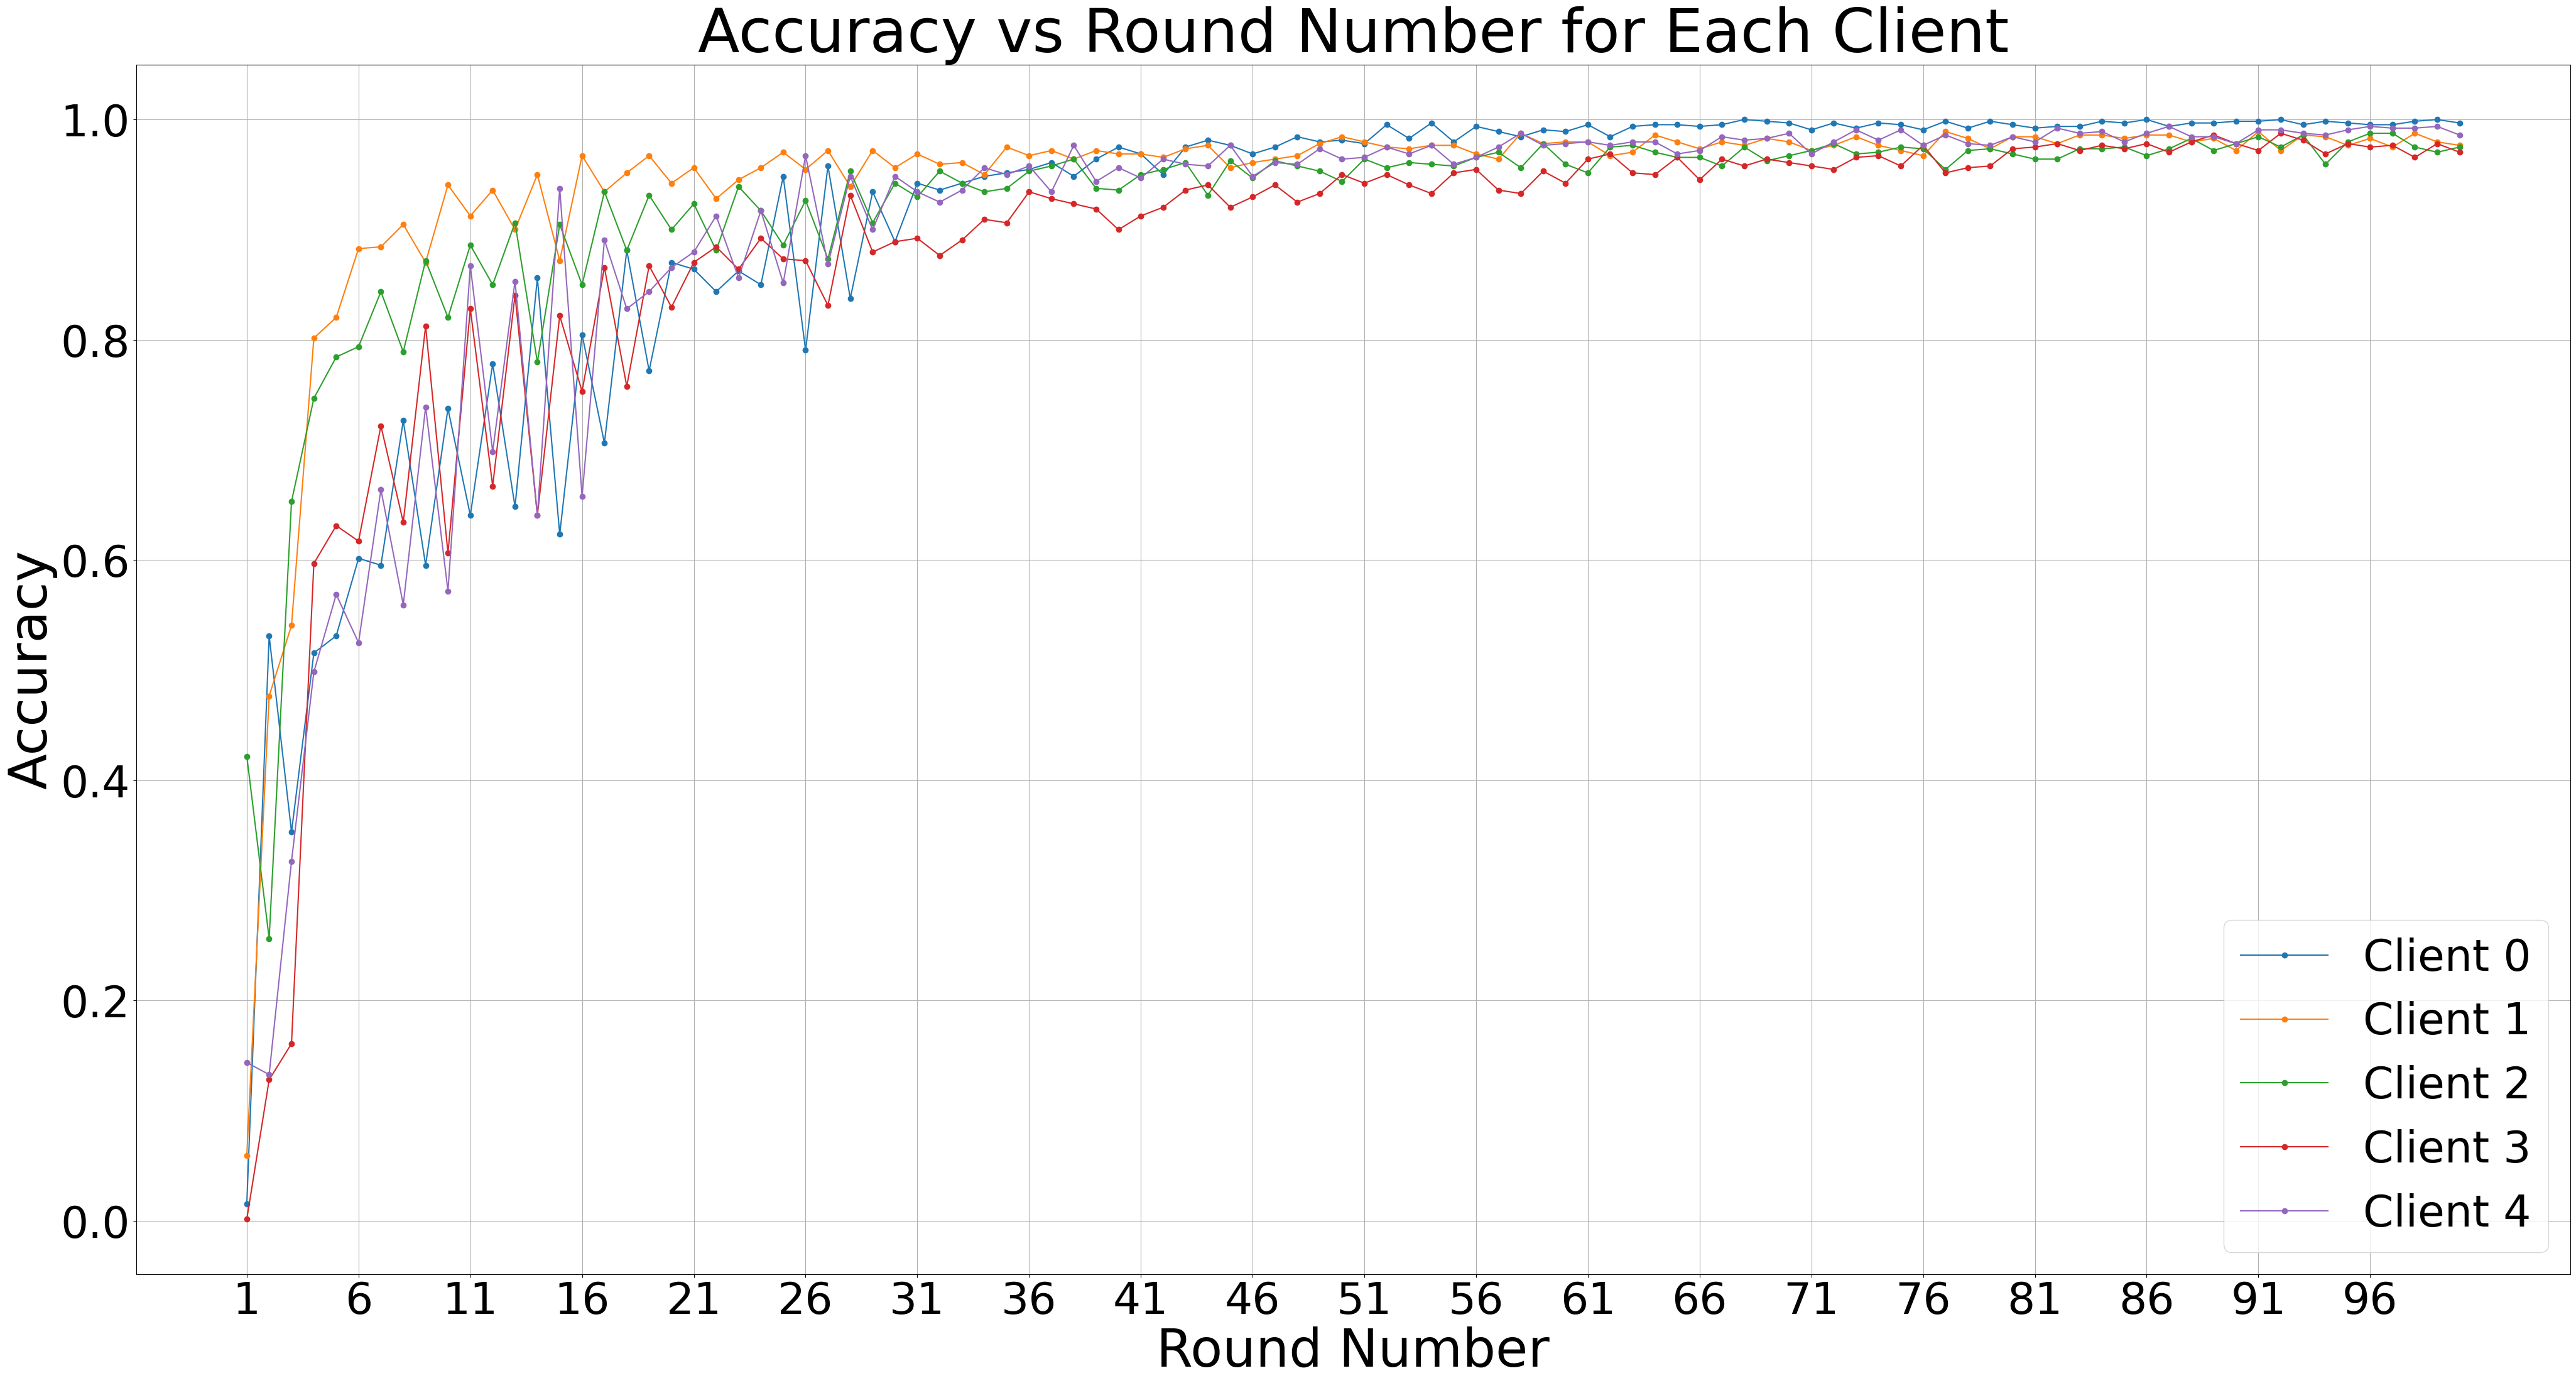

In [13]:
# Plotting
plt.figure(figsize=(50, 25))

# Sort client IDs
sorted_client_ids = sorted(data.keys())

for client_id in sorted_client_ids:
    rounds = data[client_id]
    round_numbers = []
    accuracies = []
    for round_num, metrics in rounds.items():
        round_num = int(round_num)
        round_numbers.append(round_num)  # Convert round number to integer
        accuracies.append(metrics["metrics"]["accuracy"])

    # Sort rounds and accuracies based on round numbers
    round_numbers, accuracies = zip(*sorted(zip(round_numbers, accuracies)))

    plt.plot(round_numbers, accuracies, marker="o", label=f"Client {client_id}")

plt.xlabel("Round Number", fontsize=60)
plt.ylabel("Accuracy", fontsize=60)
plt.title("Accuracy vs Round Number for Each Client", fontsize=70)
plt.xticks(
    range(1, max(round_numbers) + 1, 5), fontsize=50
)  # Ensure x-axis starts from 1 and increments by 3
plt.legend(fontsize=50, loc="lower right")  # Move legend to bottom right
plt.yticks(fontsize=50)
plt.grid(True)
plt.show()

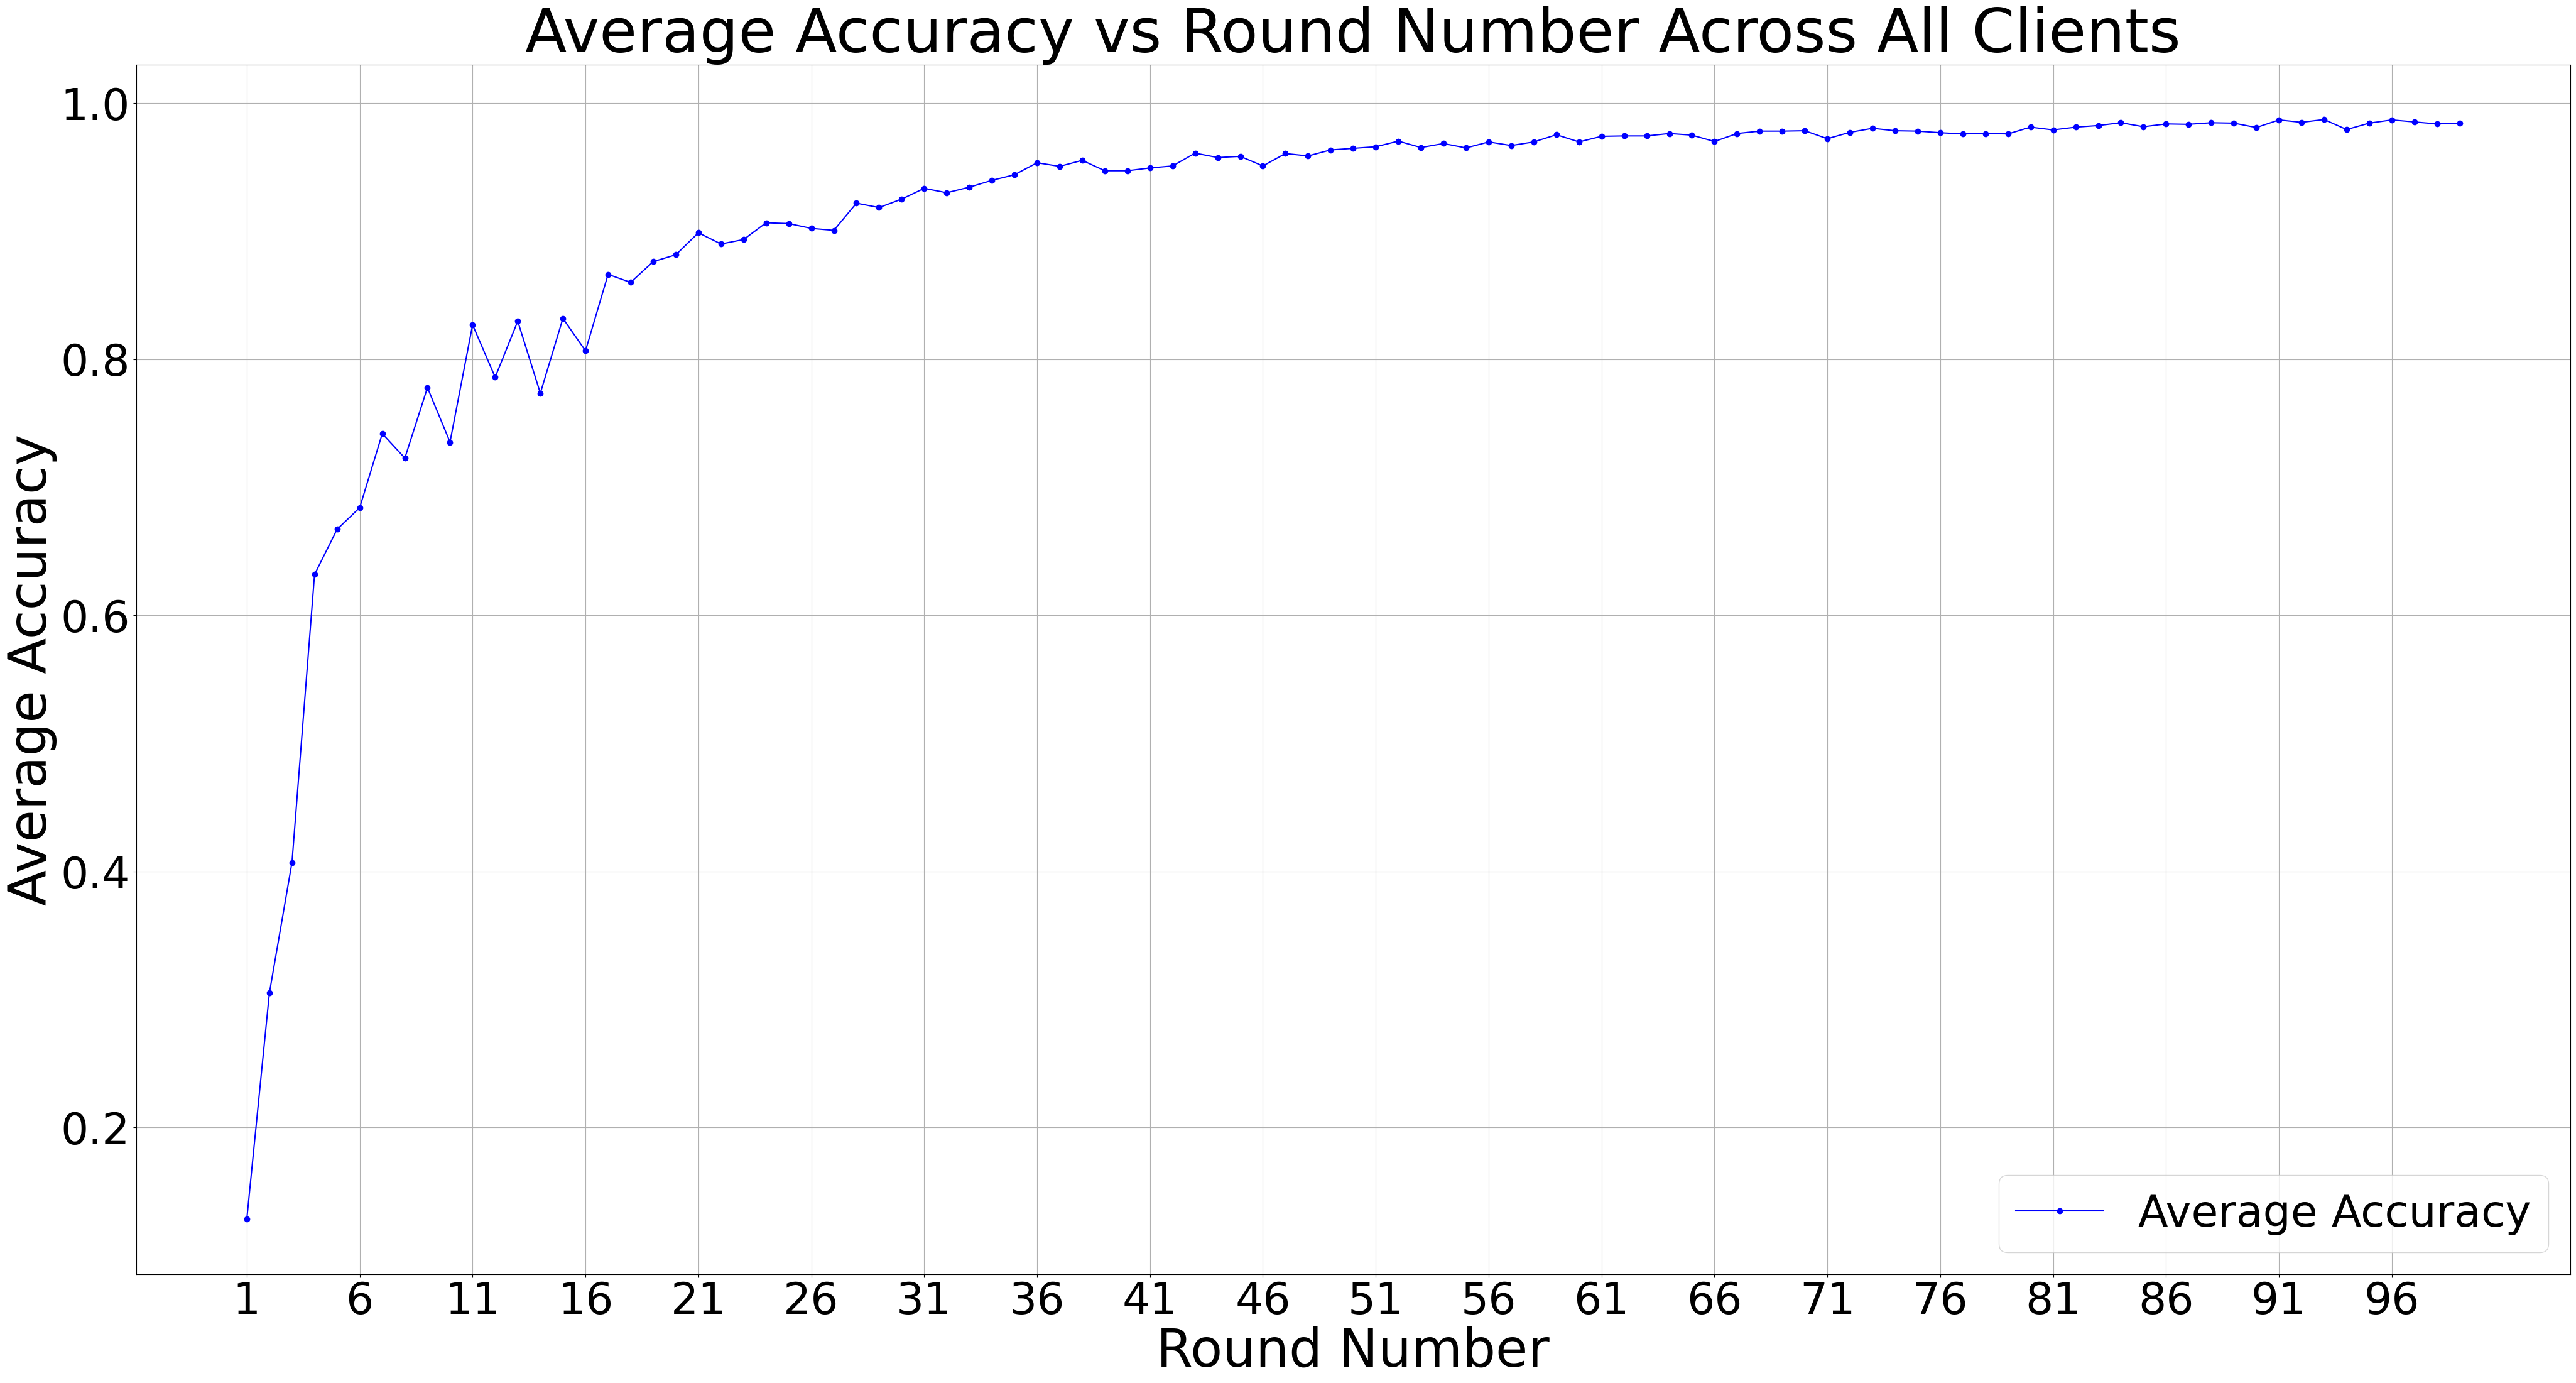

In [14]:
# Calculate average accuracy for each round
round_accuracy = defaultdict(list)

for client_id, rounds in data.items():
    for round_num, metrics in rounds.items():
        round_accuracy[int(round_num)].append(metrics["metrics"]["accuracy"])

# Calculate the average accuracy for each round
average_accuracy = {}
for round_num, accuracies in round_accuracy.items():
    if (round_num >= 0) & (round_num <= 99):
        average_accuracy[round_num] = sum(accuracies) / len(accuracies)

# Sort rounds and average accuracies
sorted_rounds = sorted(average_accuracy.keys())
sorted_avg_accuracies = [average_accuracy[round_num] for round_num in sorted_rounds]

# Plotting
plt.figure(figsize=(50, 25))
plt.plot(
    sorted_rounds,
    sorted_avg_accuracies,
    marker="o",
    linestyle="-",
    color="b",
    label="Average Accuracy",
)

plt.xlabel("Round Number", fontsize=60)
plt.ylabel("Average Accuracy", fontsize=60)
plt.title("Average Accuracy vs Round Number Across All Clients", fontsize=70)
plt.xticks(
    range(1, max(sorted_rounds) + 1, 5), fontsize=50
)  # Ensure x-axis starts from 1 and increments by 3
plt.yticks(fontsize=50)
plt.legend(fontsize=50, loc="lower right")  # Move legend to bottom right
plt.grid(True)
plt.show()